<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/3.2_SVD/3.2_8_Why_avoid_inverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from mpl_toolkits.mplot3d import Axes3D

---
# Why avoid inverse?
---

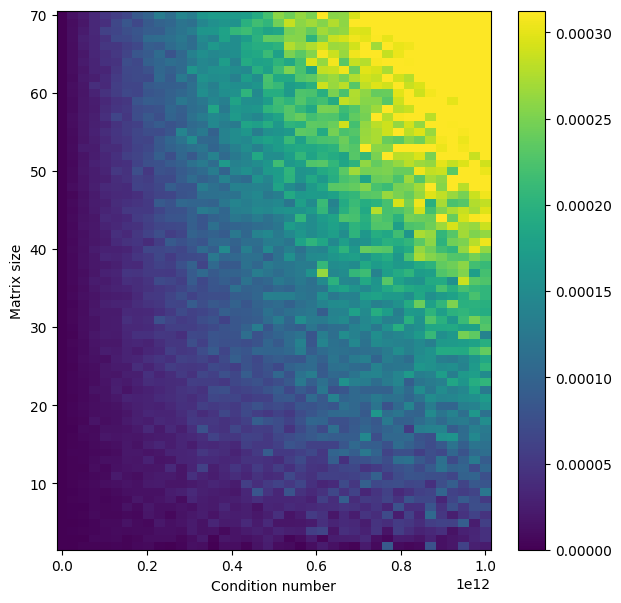

In [3]:
# matrix sizes
matrixSizes = np.arange(2,71)

# condition numbers
cond_nums = np.linspace(10, 1e12, 40)

invDiffs = np.zeros((len(matrixSizes), len(cond_nums)))

for mi,M in enumerate(matrixSizes):
  for ci,C in enumerate(cond_nums):

    # create A
    U = np.linalg.qr(np.random.randn(M,M) )[0]
    V = np.linalg.qr(np.random.randn(M,M) )[0]
    S = np.diag( np.linspace(C,1,M) )
    A = U@S@V

    # compute difference from identity matrix
    I = A@np.linalg.inv(A)
    Idiff = np.abs(I-np.eye(M))

    # norm of the matrix
    invDiffs[mi,ci] = np.linalg.norm(Idiff)

# visualize
fig = plt.figure(figsize=(7,7))
plt.pcolor(cond_nums, matrixSizes, invDiffs, vmax=np.max(invDiffs)*0.6)
plt.xlabel('Condition number')
plt.ylabel('Matrix size')
plt.colorbar()

plt.show()